In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

from numpy.linalg import inv

from numpy.linalg import norm

In [2]:
data = pd.read_csv('../../../../STUDY/[Skillbox] Профессия‌ ‌Data‌ ‌Scientist‌ (2020)/1 Data Scientist. ML. Начальный уровень/3.10_non_linear.csv')
# data

In [3]:
def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree+1)]).T

Степень полинома 12
Ошибка на валидации 0.125
Ошибка на обучении 0.051
Норма вектора весов |w|= 225.51


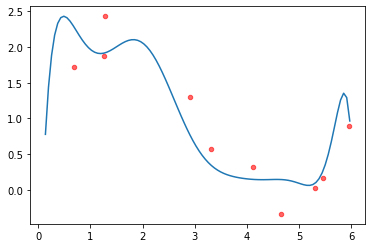

In [4]:
degree = 12

def train_polynomial(degree, data):
    """Генерация датасета и обучения модели"""
    X = generate_degrees(source_data=data.x_train, degree=degree)
    y = data.y_train
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)

    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print("Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" % (degree, error_valid, error_train))
    order_test = np.argsort(X_valid[:,0])   #чтобы нарисовать в правильном порядке точки для оси х
    # print(order_test)
    # print(X_valid[:,0])

    print('Норма вектора весов |w|= %.2f' % norm(model.coef_))

    plt.scatter(X_valid[:,0], y_valid, 20, 'r', 'o', alpha=0.6)
    #визуализация
    x_linspace = np.linspace(data.x_train.min(), data.x_train.max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)

    return error_valid, error_train, norm(model.coef_)


train_polynomial(degree=degree, data=data)
degrees = []
valid_errors = []
train_errors = []
w_norm = []


#argsort - сортирует от меньшего к большему и возвращает массив индексов этих значений

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
Норма вектора весов |w|= 2.19


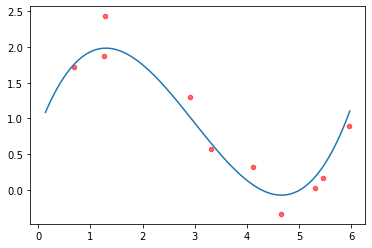

In [5]:
degree = 3

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 5
Ошибка на валидации 0.063
Ошибка на обучении 0.069
Норма вектора весов |w|= 3.31


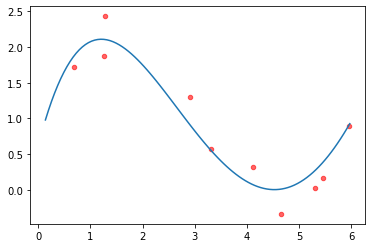

In [6]:
degree = 5

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 10
Ошибка на валидации 0.122
Ошибка на обучении 0.052
Норма вектора весов |w|= 120.14


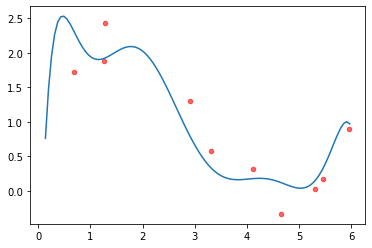

In [7]:
degree = 10

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Видим, что в какой-то момент ошибка на валидации стала сильно расти и норма вектора весов тоже еще круче

Рассмотрим разницу между моделью с регуляризацией и без

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48971e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24411e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


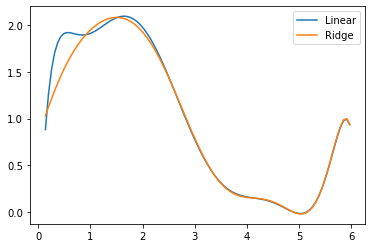

In [29]:
model_ridge = Ridge(alpha=0.01)
model_linear = Ridge(alpha=0.0)

degree = 10

X = generate_degrees(data.x_train, degree)
y = data.y_train

#study
model_ridge.fit(X, y)
model_linear.fit(X, y)

x_linspace = np.linspace(data.x_train.min(), data.x_train.max(), num=100)

y_linspace_ridge = model_ridge.predict(generate_degrees(x_linspace, degree))
y_linspace_linear = model_linear.predict(generate_degrees(x_linspace, degree))

plt.plot(x_linspace, y_linspace_linear, label='Linear')
plt.plot(x_linspace, y_linspace_ridge, label='Ridge')
plt.legend()
plt.show()      #чем больше изгибов, тем больше переобучение

Подберем наилучший коэффициент регуляризации alpha

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=46)

# print(X_train.shape, X_valid.shape)

alphas = [0, 0.001, 0.1, 0.15, 0.35, 0.5, 0.8]
best_alpha = alphas[0]
best_rmse = np.infty
for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_valid)
    error = mean_squared_error(y_valid, y_pred)
    if error < best_rmse:
        best_rmse = error
        best_alpha = alpha
    print('alpha=',alpha,'error=', error)
print('\nЛучшая модель alpha=', best_alpha, 'error=', best_rmse)

alpha= 0 error= 0.1558883488026645
alpha= 0.001 error= 0.08713637449746005
alpha= 0.1 error= 0.11606478351500038
alpha= 0.15 error= 0.11879284572876354
alpha= 0.35 error= 0.12524682577858384
alpha= 0.5 error= 0.1284656661767378
alpha= 0.8 error= 0.133150461702026

Лучшая модель alpha= 0.001 error= 0.08713637449746005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00018e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.22553e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.70064e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.41228e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0587e-17): result may not be accurate.